In [1]:
import sys
!{sys.executable} -m pip install git+https://github.com/aparrish/vsketch

  Cloning https://github.com/aparrish/vsketch to /private/var/folders/64/84sz_vl56q9bw0rj8l_68_c00000gn/T/pip-req-build-da7w31yr
  Running command git clone --filter=blob:none --quiet https://github.com/aparrish/vsketch /private/var/folders/64/84sz_vl56q9bw0rj8l_68_c00000gn/T/pip-req-build-da7w31yr
  Resolved https://github.com/aparrish/vsketch to commit 852a0aa516fe021e230e277de1b3ca8314cbb10b
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/abey79/vpype/ (to revision master) to /private/var/folders/64/84sz_vl56q9bw0rj8l_68_c00000gn/T/pip-install-g_gpnhv4/vpype_5530e18c20e64f4d92734ac48d8336bd
  Running command git clone --filter=blob:none --quiet https://github.com/abey79/vpype/ /private/var/folders/64/84sz_vl56q9bw0rj8l_68_c00000gn/T/pip-install-g_gpnhv4/vpype_5530e18c20e64f4d92734ac48d8336bd
  Resolved https://github.com/abey79/vpype/ to commit 3dbc352d3e4f37c20ff3d28e7

In [2]:
import sys
!{sys.executable} -m pip install --upgrade https://github.com/aparrish/bezmerizing/archive/main.zip

     - 242.6 kB 6.3 MB/s 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for bezmerizing: filename=bezmerizing-0.2.0-py3-none-any.whl size=12898 sha256=67c4e51ea90535cc72e9f91ac7fe00e0ae34834872273b17f1af59671146d6b4
  Stored in directory: /private/var/folders/64/84sz_vl56q9bw0rj8l_68_c00000gn/T/pip-ephem-wheel-cache-6ttlixpa/wheels/96/4c/0d/16b63492acd91653b43171152cb93cdd63c53ad8ccea1b27b3
Successfully built bezmerizing

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import random
import vsketch
import bezmerizing

In [4]:
from numpy.random import uniform, normal, choice
import numpy as np

In [5]:
from scipy.stats import truncnorm
def t_normal(a, b, mu, sigma):
    tn = truncnorm((a-mu)/sigma, (b-mu)/sigma, loc=mu, scale=sigma)
    return tn.rvs(1)[0]

In [7]:
def uniform_glyph_baseline(n=10):
    pts = [[-0.4, 0.5], [0.4, 0.5]]
    for i in range(n):
        pts.append([uniform(-0.5, 0.5), uniform(-0.5, 0.5)])
    return pts

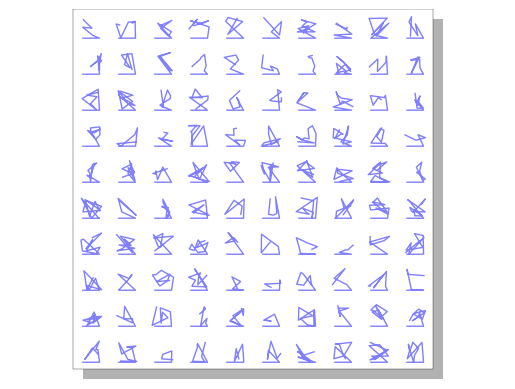

In [8]:
# parameters for the grid---play with these values!
width = 100
height = 100
grid_size = 10

# calculate how large each "cell" of the grid is
cell_size_x = width / grid_size
cell_size_y = height / grid_size

# how much to scale the grid: size of cell times a multiplier
# (multiplier controls how much space in the cell the glyph will take up)
scale_val = (width / grid_size) * 0.6

vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")
vsk.scale("1mm")

for i in range(grid_size):
    for j in range(grid_size):
        glyph = uniform_glyph_baseline(random.randrange(4, 12))
        with vsk.pushMatrix():
            vsk.translate(i * cell_size_x, j * cell_size_y)
            vsk.scale(scale_val)
            vsk.polygon(glyph)

vsk.display()

In [10]:
def make_scribble(width, height, steps, stddev=0):
    pts = []
    for i in range(steps):
        x = ((width / steps) * i) + normal(0, stddev)
        y = normal(0, height)
        pts.append([x, y])
    return pts

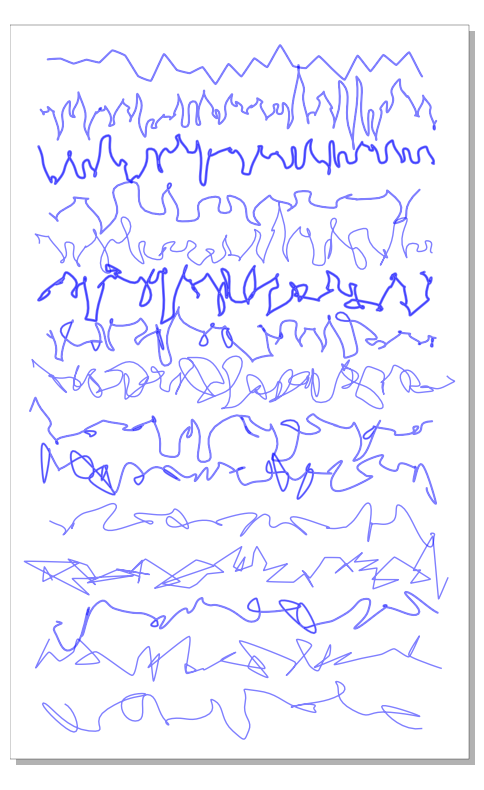

In [11]:
vsk = vsketch.Vsketch()
vsk.size("200mm", "320mm")
vsk.scale("1mm")
for i in range(15):
    pts = make_scribble(width=180, height=5, steps=int(uniform(25, 100)), stddev=i * 0.5)
    curve_pts = bezmerizing.Polyline(pts).catmull_spline(tightness=uniform(-4, 1)).to_polyline(10)
    vsk.strokeWeight(choice([1, 2, 3]))
    with vsk.pushMatrix():
        vsk.translate(0, i * 20)
        vsk.polygon(curve_pts)
vsk.display(fig_size=(6, 10))

In [2]:
import vsketch
import random
from copy import deepcopy

width = 100
height = 100
grid_size = 10

cell_size_x = width / grid_size
cell_size_y = height / grid_size

scale_val = (width / grid_size) * 0.5

def asemic_glyph():
    glyph = []
    num_points = random.randint(3, 6)
    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        glyph.append((x, y))
    return glyph

vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")
vsk.scale("1mm")

base_glyphs = [asemic_glyph() for _ in range(5)]

for j in range(grid_size):
    line_length = random.randint(4, grid_size)
    for i in range(line_length):
        x_offset = (j % 2) * (cell_size_x * 0.4)
        glyph = deepcopy(random.choice(base_glyphs))

        glyph = [(x + random.uniform(-0.1, 0.1), y + random.uniform(-0.1, 0.1)) for x, y in glyph]

        with vsk.pushMatrix():
            vsk.translate(i * cell_size_x + x_offset, j * cell_size_y)
            vsk.scale(scale_val)
            vsk.rotate(random.uniform(-0.3, 0.3))
            vsk.polygon(glyph)

            if random.random() < 0.3:
                vsk.fill(1)
                dot_size = random.uniform(0.2, 0.5)
                vsk.circle(random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5), dot_size)
                vsk.fill(0)
vsk.display()

ValueError: width should be a strictly positive integer

In [4]:
import vsketch
import random
from copy import deepcopy

width = 100
height = 100
grid_size = 10

cell_size_x = width / grid_size
cell_size_y = height / grid_size

scale_val = (width / grid_size) * 0.5

def asemic_glyph():
    glyph = []
    num_points = random.randint(3, 6)
    for _ in range(num_points):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        glyph.append((x, y))
    return glyph

vsk = vsketch.Vsketch()
vsk.size(f"{width}mm", f"{height}mm")
vsk.scale("1mm")

base_glyphs = [asemic_glyph() for _ in range(5)]

for j in range(grid_size):
    line_length = random.randint(4, grid_size)
    for i in range(line_length):
        x_offset = (j % 2) * (cell_size_x * 0.4)
        glyph = deepcopy(random.choice(base_glyphs))

        glyph = [(x + random.uniform(-0.1, 0.1), y + random.uniform(-0.1, 0.1)) for x, y in glyph]

        with vsk.pushMatrix():
            vsk.translate(i * cell_size_x + x_offset, j * cell_size_y)
            vsk.scale(scale_val)
            vsk.rotate(random.uniform(-0.3, 0.3))
            vsk.polygon(glyph)

            if random.random() < 0.3:
                vsk.strokeWeight(random.uniform(0.3, 0.7))
                vsk.circle(random.uniform(-0.5, 0.5), random.uniform(-0.5, 0.5), random.uniform(0.1, 0.4))

vsk.display()

ValueError: width should be a strictly positive integer